# Pymaceuticals Inc.
---

### Analysis

- The mice were mostly treated with Capomulin and Ramicane which was the most effective treatment. There is also a correlation between weight & tumor volume for mice that took Capomulin.Mouse l509 the tumor volume lowered with Capomulin 
 

In [23]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
complete_study = pd.merge(study_results, mouse_metadata, how = "left", on="Mouse ID")
# Display the data table for preview
complete_study.head(15)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25
5,h246,0,45.0,0,Ketapril,Male,13,30
6,p189,0,45.0,0,Ketapril,Male,8,28
7,n923,0,45.0,0,Ketapril,Male,19,30
8,q119,0,45.0,0,Ketapril,Male,17,30
9,f993,0,45.0,0,Naftisol,Male,21,28


In [24]:
# Checking the number of mice.
len(complete_study["Mouse ID"].unique())

249

In [25]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mouseid = complete_study.loc[complete_study.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"].unique()
duplicate_mouseid[0]

'g989'

In [26]:
# Optional: Get all the data for the duplicate mouse ID. 


In [27]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_studydata = complete_study[complete_study["Mouse ID"].isin(duplicate_mouseid)==False]
clean_studydata.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [28]:
# Checking the number of mice in the clean DataFrame.
len(clean_studydata["Mouse ID"].unique())

248

## Summary Statistics

In [29]:
means = clean_studydata.groupby("Drug Regimen").mean("Tumor Volumes (mm3)")
means

,Timepoint,Tumor Volume (mm3),Metastatic Sites,Age_months,Weight (g)
Drug Regimen,,,,,
Capomulin,21.565217,40.675741,0.713043,13.456522,19.965217
Ceftamin,19.747191,52.591172,1.179775,13.247191,27.398876
Infubinol,18.174157,52.884795,0.960674,16.230337,27.196629
Ketapril,19.707447,55.235638,1.297872,15.659574,27.861702
Naftisol,19.623656,54.331565,1.182796,12.000000,27.166667
Placebo,18.674033,54.033581,1.441989,10.734807,27.928177
Propriva,17.060811,52.320930,1.013514,10.006757,27.135135
Ramicane,21.425439,40.216745,0.548246,10.684211,19.679825
Stelasyn,19.226519,54.233149,0.872928,12.784530,27.856354


In [30]:
median = clean_studydata.groupby("Drug Regimen").median("Tumor Volumes (mm3)")
median

,Timepoint,Tumor Volume (mm3),Metastatic Sites,Age_months,Weight (g)
Drug Regimen,,,,,
Capomulin,20.0,41.557809,0.0,16.5,20.5
Ceftamin,20.0,51.776157,1.0,12.0,28.0
Infubinol,15.0,51.820584,1.0,20.0,27.0
Ketapril,20.0,53.698743,1.0,18.0,28.0
Naftisol,20.0,52.509285,1.0,9.0,27.0
Placebo,15.0,52.288934,1.0,10.0,28.0
Propriva,15.0,50.446266,1.0,7.5,26.0
Ramicane,20.0,40.673236,0.0,9.0,19.0
Stelasyn,20.0,52.431737,1.0,14.0,28.0


In [31]:
variances = clean_studydata.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
variances

Drug Regimen
Capomulin    24.947764
Ceftamin     39.290177
Infubinol    43.128684
Ketapril     68.553577
Naftisol     66.173479
Placebo      61.168083
Propriva     43.852013
Ramicane     23.486704
Stelasyn     59.450562
Zoniferol    48.533355
Name: Tumor Volume (mm3), dtype: float64

In [32]:
standard_div = clean_studydata.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
standard_div

Drug Regimen
Capomulin    4.994774
Ceftamin     6.268188
Infubinol    6.567243
Ketapril     8.279709
Naftisol     8.134708
Placebo      7.821003
Propriva     6.622085
Ramicane     4.846308
Stelasyn     7.710419
Zoniferol    6.966589
Name: Tumor Volume (mm3), dtype: float64

In [33]:
standard_error = clean_studydata.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()
standard_error

Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.544332
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

In [34]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
summary = {
    "Mean Tumor Volume" : means["Tumor Volume (mm3)"],
    "Median Tumor Volume" : median["Tumor Volume (mm3)"],
    "Variance Tumor Volume" : variances,
    "Tumor Volume Std.Dev.": standard_div,
    "Tumor Volume Std. Err." : standard_error
}
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
df = pd.DataFrame(summary)
df

,Mean Tumor Volume,Median Tumor Volume,Variance Tumor Volume,Tumor Volume Std.Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [35]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
Second_summary = clean_studydata.groupby("Drug Regimen").agg(
    {"Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]}
)
Second_summary

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

<Axes: xlabel='Drug Regimen'>

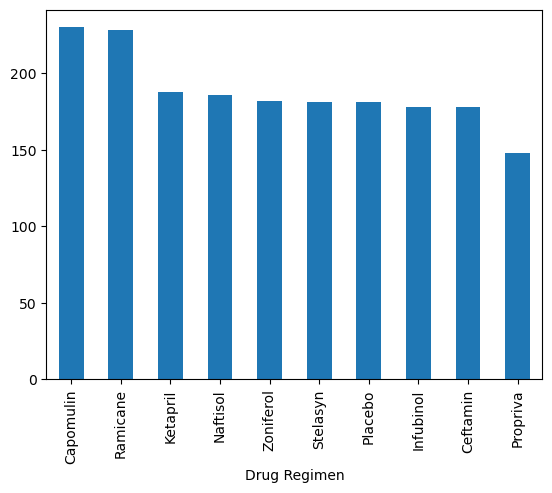

In [36]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
count = clean_studydata["Drug Regimen"].value_counts()
count.plot(kind = "bar")

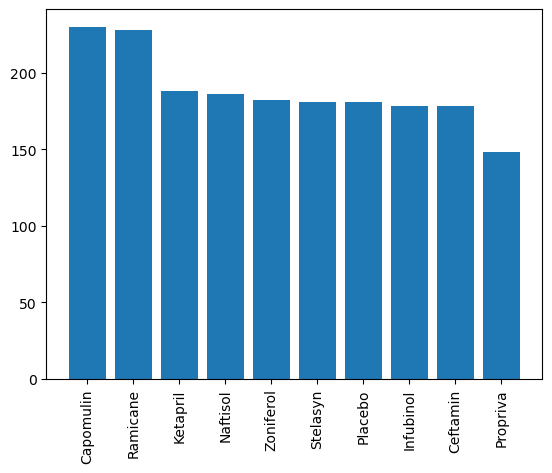

In [37]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
count.index.values
count.values

plt.bar(count.index.values,
       count.values)

plt.xticks(rotation = 90)
plt.show()

<Axes: ylabel='count'>

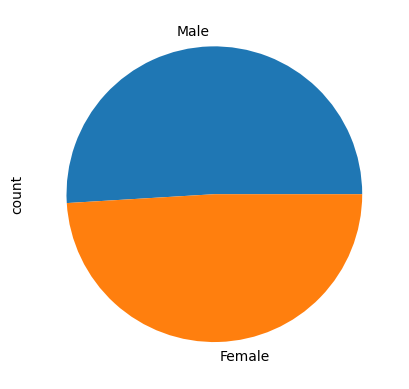

In [38]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
count = clean_studydata["Sex"].value_counts()
count.plot(kind = "pie")

([<matplotlib.patches.Wedge at 0x28abe7710>,
 [Text(-0.03308201408261547, 1.0995024239828841, 'Male'),
  Text(0.033082014082615095, -1.0995024239828841, 'Female')])

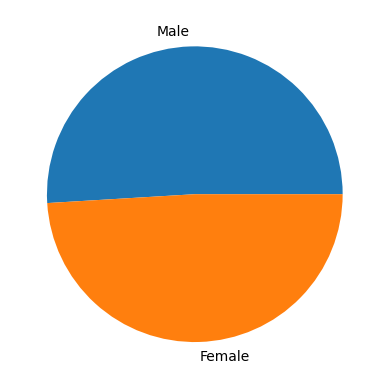

In [39]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
count.index.values
count.values

plt.pie(count.values,
       labels = count.index.values
       )

## Quartiles, Outliers and Boxplots

In [40]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
Maxtime = clean_studydata.groupby("Mouse ID")["Timepoint"].max()
Maxtime = Maxtime.reset_index()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_data = Maxtime.merge(clean_studydata, on =["Mouse ID", "Timepoint"], how = "left")
merged_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29


In [41]:
treatment_list = ["Capomulin", "Ramicane", "Infubinol","Ceftamin"]

tumor_vol_list = []


for treatment in treatment_list:
    info = merged_data.loc[merged_data["Drug Regimen"] == treatment]
    
info

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
3,a275,45,62.999356,3,Ceftamin,Female,20,28
21,b447,0,45.000000,0,Ceftamin,Male,2,30
22,b487,25,56.057749,1,Ceftamin,Female,6,28
25,b759,30,55.742829,1,Ceftamin,Female,12,25
58,f436,15,48.722078,2,Ceftamin,Female,3,25
75,h531,5,47.784682,0,Ceftamin,Male,5,27
88,j296,45,61.849023,3,Ceftamin,Female,24,30
94,k210,45,68.923185,3,Ceftamin,Male,15,28
106,l471,45,67.748662,1,Ceftamin,Female,7,28
107,l490,30,57.918381,3,Ceftamin,Male,24,26


In [42]:
for treatment in treatment_list:
 final_tumor = merged_data.loc[merged_data["Drug Regimen"]== treatment, "Tumor Volume (mm3)"]

final_tumor

3      62.999356
21     45.000000
22     56.057749
25     55.742829
58     48.722078
75     47.784682
88     61.849023
94     68.923185
106    67.748662
107    57.918381
109    46.784535
110    59.851956
113    64.299830
134    59.741901
150    61.433892
154    64.192341
184    45.000000
188    52.925348
189    45.000000
209    67.527482
223    45.000000
228    64.634949
231    61.386660
238    68.594745
240    64.729837
Name: Tumor Volume (mm3), dtype: float64

In [43]:
tumor_vol_list = []

for treatment in treatment_list:
    final_tumor = merged_data.loc[merged_data["Drug Regimen"]== treatment, "Tumor Volume (mm3)"]

    tumor_vol_list.append(final_tumor)

tumor_vol_list #prints s

[19     38.982878
 24     38.939633
 61     30.485985
 64     37.074024
 66     40.159220
 80     47.685963
 83     37.311846
 85     38.125164
 87     38.753265
 108    41.483008
 115    38.846876
 121    28.430964
 124    33.329098
 162    46.539206
 163    32.377357
 169    41.581521
 174    23.343598
 180    40.728578
 183    34.455298
 192    31.023923
 204    40.658124
 208    39.952347
 220    36.041047
 226    28.484033
 239    31.896238
 Name: Tumor Volume (mm3), dtype: float64,
 6      38.407618
 7      43.047543
 10     38.810366
 12     32.978522
 33     38.342008
 37     33.397653
 45     37.311236
 52     40.659006
 70     29.128472
 76     33.562402
 77     36.374510
 91     31.560470
 93     36.134852
 96     22.050126
 119    30.564625
 126    31.095335
 157    45.220869
 158    36.561652
 166    37.225650
 168    43.419381
 177    30.276232
 190    40.667713
 217    43.166373
 235    44.183451
 244    30.638696
 Name: Tumor Volume (mm3), dtype: float64,
 0      67.973

In [44]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = ["Capomulin", "Ramicane", "Infubinol","Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # Locate the rows which contain mice on each drug and get the tumor volum
    # add subset 
    # Determine outliers using upper and lower bounds

for treatment in treatment_list:
    final_tumor = merged_data.loc[merged_data["Drug Regimen"]== treatment, "Tumor Volume (mm3)"]

    tumor_vol_list.append(final_tumor)

    quartiles = final_tumor.quantile([.25, .5, .75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = final_tumor.loc[(final_tumor < lower_bound) | (final_tumor > upper_bound)]                                                          
    if len(outliers) == 0:
        print(f"{treatment}s potential outliers: None")
    else:
        output = f"{treatment}s potential outliers: "
        for o in outliers:
            output += f"{o} "
        print(output)
                                         
    

Capomulins potential outliers: None
Ramicanes potential outliers: None
Infubinols potential outliers: 36.3213458 
Ceftamins potential outliers: None


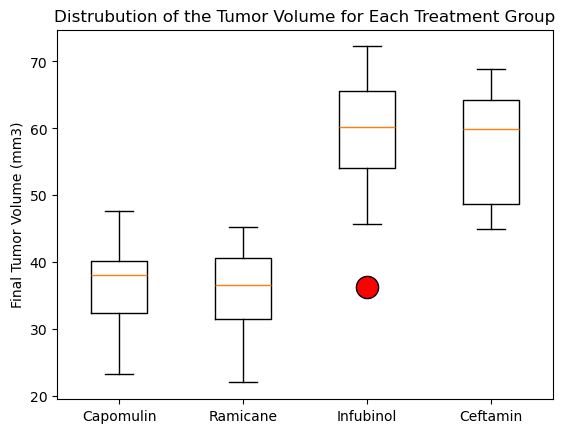

In [45]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
flierprops = dict(marker='o', markerfacecolor='red', markersize=16,
                 markeredgecolor='black')

plt.boxplot(tumor_vol_list, labels = treatment_list,flierprops=flierprops)
plt.ylabel('Final Tumor Volume (mm3)')
plt.title("Distrubution of the Tumor Volume for Each Treatment Group")
plt.show()

## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

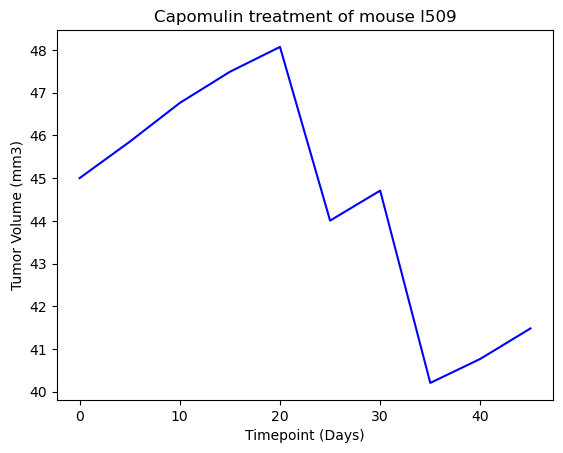

In [46]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
capomulin = clean_studydata.loc[clean_studydata["Drug Regimen"]=="Capomulin"]


l509Df= capomulin.loc[capomulin["Mouse ID"]== "l509"]

capomulin = clean_studydata.loc[clean_studydata["Drug Regimen"]=="Capomulin"]
l509Df= capomulin.loc[capomulin["Mouse ID"]== "l509"]
plt.plot(l509Df["Timepoint"],
        l509Df["Tumor Volume (mm3)"],
        color = "blue")
plt.title("Capomulin treatment of mouse l509")
plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumor Volume (mm3)")

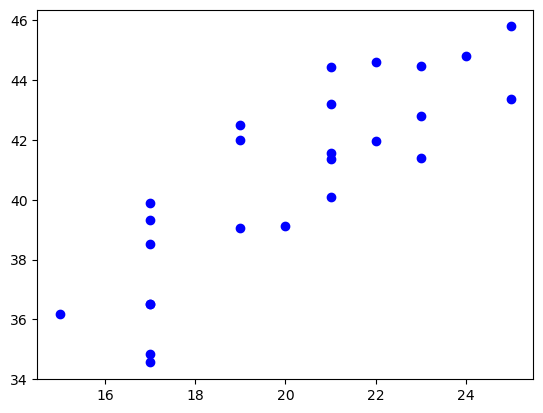

In [47]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulinAvg = capomulin.groupby("Mouse ID").mean("Tumor Volumes (mm3)","Weight (g)")
plt.scatter(
    capomulinAvg["Weight (g)"],
    capomulinAvg["Tumor Volume (mm3)"],
    facecolor = "blue"
    )

plt.show()

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is  0.84


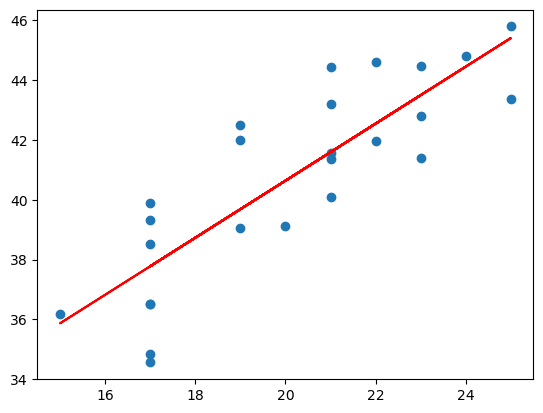

In [48]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
corr = st.pearsonr(capomulinAvg['Weight (g)'], capomulinAvg['Tumor Volume (mm3)'])[0]
print(f"The correlation between mouse weight and the average tumor volume is {corr: .2f}")

x_values = capomulinAvg["Weight (g)"]
y_values = capomulinAvg["Tumor Volume (mm3)"]

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(capomulinAvg['Weight (g)'],
                                                            capomulinAvg['Tumor Volume (mm3)'])

regressValue = x_values * slope + intercept
lineEQ = f"y = {slope:.2f}X + {intercept:.2f}"

plt.scatter(x_values, y_values)
plt.plot(x_values, regressValue, "r-")
plt.show()